# Assignment 4 (Week 4)

>**Note**: Late submissions are ***`penalized`***.

## Name: FAIZA YUSUF

<br>

### Please show and display all your calculations and results.

In [361]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Built-in library
import itertools
import re
import json
from typing import Union, Optional

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 50

# Black code formatter (Optional)
#%load_ext lab_black

### nb_black Installation And Usage

```bash
# On your command line, run:
pip install nb_black 
```


```python
# For jupyter notebook
%load_ext nb_black

# For jupyter lab
%load_ext lab_black
```


### Qs1

#### The data can be found [here](https://drive.google.com/file/d/1WFMBMR4e5o2B1rzDbOWaTorZRuKU3UOD/view?usp=share_link)

a.) Create a new column called **`Name`** from the **`Artist`** column. Return the name of the artist. \
e.g. \
`Tawaraya SÅtatsu, 17th century, Gold leaf and ink on paper`: `Tawaraya SÅ tatsu` \
`Artist Unknown, circa 190 BCE, Marble `: `Artist Unknown`


b.) Create a new column called **`Date`** from the `Artist` column which extracts the date/period
from the `Artist` column. \
e.g. \
`TÅshÅ«sai Sharaku, 1794, Woodblock print`: `1974` \
`Artist Unknown, 196 BCE, Granodiorite`: `196 BCE`

c.) Finally, Create a new column called **`Art_type`** by extracting values from `Artist` column. \
e.g. \
`TÅshÅ«sai Sharaku, 1794, Woodblock print`: `Woodblock print` \
`Artist Unknown, 196 BCE, Granodiorite`: `Granodiorite`

* To validate your results, find the **`unique values`** in **`each column`** you created.

In [368]:
df = pd.read_csv("art.csv").copy()
print(df.shape)

df.head(3)

(70, 26)


,Name,Genuine,Category,Buy,Sell,Color 1,Color 2,Size,Real Artwork Title,Artist,Museum Description,Source,Source Notes,Version,HHA Concept 1,HHA Concept 2,HHA Series,HHA Set,Interact,Tag,Speaker Type,Lighting Type,Catalog,Filename,Internal ID,Unique Entry ID
0,academic painting,Yes,Wall-mounted,4980,1245,None,None,1x1,Vitruvian Man,"Leonardo da Vinci, circa 1487, Pen and ink on ...","This drawing is based on the ""ideal"" human-bod...",Jolly Redd's Treasure Trawler,NaN,1.2.0,expensive,facility,None,None,No,Picture,Does not play music,No lighting,Not for sale,FtrArtVitruvianMan,12619,xfTf9sfyLkxHQEz4u
1,academic painting,No,Wall-mounted,4980,0,None,None,1x1,Vitruvian Man,"Leonardo da Vinci, circa 1487, Pen and ink on ...","This drawing is based on the ""ideal"" human-bod...",Jolly Redd's Treasure Trawler,NaN,1.2.0,horror,None,None,None,No,Picture,Does not play music,No lighting,Not for sale,FtrArtVitruvianManFake,12620,5KNFAo3LkdTTJPQkd
2,amazing painting,Yes,Wall-mounted,4980,1245,None,None,2x2,The Night Watch,"Rembrandt van Rijn, 1642, Oil on canvas","This masterpiece, painted by 17th century Dutc...",Jolly Redd's Treasure Trawler,NaN,1.2.0,expensive,facility,None,None,No,Picture,Does not play music,No lighting,Not for sale,FtrArtNightWatch,56,Sg6MCSG3m9tvjGWoj


In [378]:
x= df["Artist"].apply(lambda x: x.split(",")[0])
x.unique()


array(['Leonardo da Vinci', 'Rembrandt van Rijn', 'Artist Unknown',
       'Thomas Gainsborough', 'Georges Seurat', 'Jean-François Millet',
       'Itō Jakuchū', 'Katsushika Hokusai', 'Auguste Rodin',
       'Vincent van Gogh', 'Michelangelo',
       'Joseph Mallord William Turner', 'Hishikawa Moronobu',
       'Thomas Ridgeway Gould', 'Giuseppe Arcimboldo',
       'Sandro Botticelli', 'Arnold Böcklin', 'Thutmose', 'Édouard Manet',
       'Paul Cézanne', 'Johannes Vermeer', 'Tōshūsai Sharaku',
       'Pieter Brueghel the Elder', 'John Everett Millais',
       'Diego Velázquez', 'Francisco de Goya', 'Tawaraya Sōtatsu',
       'Eugène Delacroix'], dtype=object)

In [379]:
y = df["Artist"].apply(lambda x: x.split(",")[-1])
y.unique()

array([' Pen and ink on paper', ' Oil on canvas', ' Fired pottery',
       ' Marble', ' Dyed silk', ' Woodblock print', ' Bronze',
       ' Oil on poplar', ' Color on silk', ' Granodiorite',
       ' Tempura on canvas', ' Oil on wood', ' circa 1345 BCE',
       ' andesite', ' Oil on wood panel', ' Earthenware',
       ' Gold leaf and ink on paper'], dtype=object)

In [382]:
z = df["Artist"].apply(lambda x: x.split(",")[1])
z.unique()

array([' circa 1487', ' 1642', ' 1000-400 BCE', ' 1770', ' circa 130 BCE',
       ' circa 1885', ' 1857', ' 18th century', ' circa 1831', ' 1902',
       ' circa 1503', ' circa 1888', ' circa 1504', ' 1839',
       ' 17th century', ' circa 1883', ' 196 BCE', ' circa 1563',
       ' circa 1850', ' 5th century BCE', ' circa 1485', ' 1883',
       ' circa 1345 BCE', ' 1866', ' circa 1899', ' circa 1882',
       ' circa 1658', ' 2nd century CE', ' circa 1000 BCE', ' 1794',
       ' 1565', ' circa 1490', ' 1852', ' circa 1656', ' 1200 BCE',
       ' 1889', ' circa 190 BCE', ' circa 1805', ' 210 BCE',
       ' circa 1665', ' 1830'], dtype=object)

In [355]:
# 1a Enter your solution here
pattern = r"(\w+\s*\w*\s*\w*\s*\w*)"
df["Artist Name"] = df["Artist"].str.extract(pat=pattern, flags=re.I)
df["Artist Name"].unique()

array(['Leonardo da Vinci', 'Rembrandt van Rijn', 'Artist Unknown',
       'Thomas Gainsborough', 'Georges Seurat', 'Jean', 'Itō Jakuchū',
       'Katsushika Hokusai', 'Auguste Rodin', 'Vincent van Gogh',
       'Michelangelo', 'Joseph Mallord William Turner',
       'Hishikawa Moronobu', 'Thomas Ridgeway Gould',
       'Giuseppe Arcimboldo', 'Sandro Botticelli', 'Arnold Böcklin',
       'Thutmose', 'Édouard Manet', 'Paul Cézanne', 'Johannes Vermeer',
       'Tōshūsai Sharaku', 'Pieter Brueghel the Elder',
       'John Everett Millais', 'Diego Velázquez', 'Francisco de Goya',
       'Tawaraya Sōtatsu', 'Eugène Delacroix'], dtype=object)

In [291]:
# 1b Enter your solution here
pattern = r"(\w*\s*\d+\-?\w*\s*\w*\s*\w*)"
df["Date"] = df["Artist"].str.extract(pat=pattern, flags=re.I)
df["Date"].unique()

array(['circa 1487', ' 1642', ' 1000-400 BCE', ' 1770', 'circa 130 BCE',
       'circa 1885', ' 1857', ' 18th century', 'circa 1831', ' 1902',
       'circa 1503', 'circa 1888', 'circa 1504', ' 1839', ' 17th century',
       'circa 1883', ' 196 BCE', 'circa 1563', 'circa 1850',
       ' 5th century BCE', 'circa 1485', ' 1883', 'circa 1345 BCE',
       ' 1866', 'circa 1899', 'circa 1882', 'circa 1658',
       ' 2nd century CE', 'circa 1000 BCE', ' 1794', ' 1565',
       'circa 1490', ' 1852', 'circa 1656', ' 1200 BCE', ' 1889',
       'circa 190 BCE', 'circa 1805', ' 210 BCE', 'circa 1665', ' 1830'],
      dtype=object)

In [316]:
# 1c Enter your solution here
pattern =  r"(\w*\s*\w*\s*\w*\s*\w*\s*\w*\s*\w+$)"
df["Art_Type"] = df["Artist"].str.extract(pat=pattern, flags=re.I)
df["Art_Type"].unique()

array([' Pen and ink on paper', ' Oil on canvas', ' Fired pottery',
       ' Marble', ' Dyed silk', ' Woodblock print', ' Bronze',
       ' Oil on poplar', ' Color on silk', ' Granodiorite',
       ' Tempura on canvas', ' Oil on wood', ' circa 1345 BCE',
       ' andesite', ' Oil on wood panel', ' Earthenware',
       'Gold leaf and ink on paper'], dtype=object)

### Qs 2:

#### The data can be found [here](https://drive.google.com/file/d/1xSfSnIWZEWo9WHIXSRfOKRGcCyZ-iNtk/view?usp=share_link)

a.) Write a `Python class`, **`NumericTransformers`**, that can be used to apply the following transformations to columns: `no_of_adults`, `arrival_month` and `no_of_special_requests`

    i.) Sigmoid transformation
    
$$\sigma(x) = \frac {1}{1+e^{-x}}$$
    
    ii.) Cube root transformation
    
$$x_{transformed} = \sqrt[3]{x}$$
    
    
```python
class NumericTransformers:
    """This class is used to apply 'Sigmoid' and 'Cube root'
    transformations to the input data (Vector)."""
    pass
```

Create a `new dataframe` and find the **`descriptive summary statistics`** of the newly transformed features for **each transformation**. \
Hint: Use `.describe()`

b.) Find the **correlation** between the numeric data . Visualize your result using **Seaborn's heatmap**.


In [183]:
df = pd.read_csv("Hotel Reservations.csv").copy()
df.head(3)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled


In [11]:
class NumericalTransformers:
    
    """This class is used to apply 'Sigmoid' and 'Cube root'
    transformations to the input data (Vector)."""
    
    def __init__(self, vector: pd.core.series)-> None:
        self.vector = vector
        
    def __repr__(self) -> str:
        """This returns the string representation."""
        return (
            f"{self.__class__.__name__}(mean={round(self.vector.mean(), 3)}, "
            f"shape={self.vector.shape}, "
            f"ndim={self.vector.ndim})"
        )
    
    def sigmoid(self):
        """ This method returns a sigmoid transformation """
        denomerator = np.add(1, np.exp(-self.vector))
        sigmoid_ = np.divide(1,denomerator)
        return sigmoid_
    
    def cube_root(self):
        """ This method returns cube root transformation """
        return np.cbrt(self.vector)
        

    

In [12]:
# 2ai Enter your solution here
temp = ["no_of_adults","arrival_month", "no_of_special_requests"]
transformed_data = []

#using loop to do for all
for i in temp:
    transformation = NumericalTransformers(df[i])
    cube_root_data = transformation.cube_root()
    transformed_data.append(cube_root_data)
    
# tranforming it to datafram
df_cube_root = pd.DataFrame(transformed_data).T
df_cube_root.describe()

,no_of_adults,arrival_month,no_of_special_requests
count,36275.000000,36275.000000,36275.000000
mean,1.211747,1.901298,0.495722
std,0.142353,0.319375,0.550934
min,0.000000,1.000000,0.000000
25%,1.259921,1.709976,0.000000
50%,1.259921,2.000000,0.000000
75%,1.259921,2.154435,1.000000
max,1.587401,2.289428,1.709976


In [13]:
# 2aii Enter your solution here
temp = ["no_of_adults","arrival_month", "no_of_special_requests"]
transformed_data = []

# using loops to do for all
for i in temp:
    transformation = NumericalTransformers(df[i])
    sigmoid_data = transformation.sigmoid() 
    transformed_data.append(sigmoid_data)

# making it a dataframe
df_sigmoid = pd.DataFrame(transformed_data).T
df_sigmoid.describe()

,no_of_adults,arrival_month,no_of_special_requests
count,36275.000000,36275.000000,36275.000000
mean,0.852203,0.981613,0.627820
std,0.069484,0.050257,0.149031
min,0.500000,0.731059,0.500000
25%,0.880797,0.993307,0.500000
50%,0.880797,0.999665,0.500000
75%,0.880797,0.999955,0.731059
max,0.982014,0.999994,0.993307


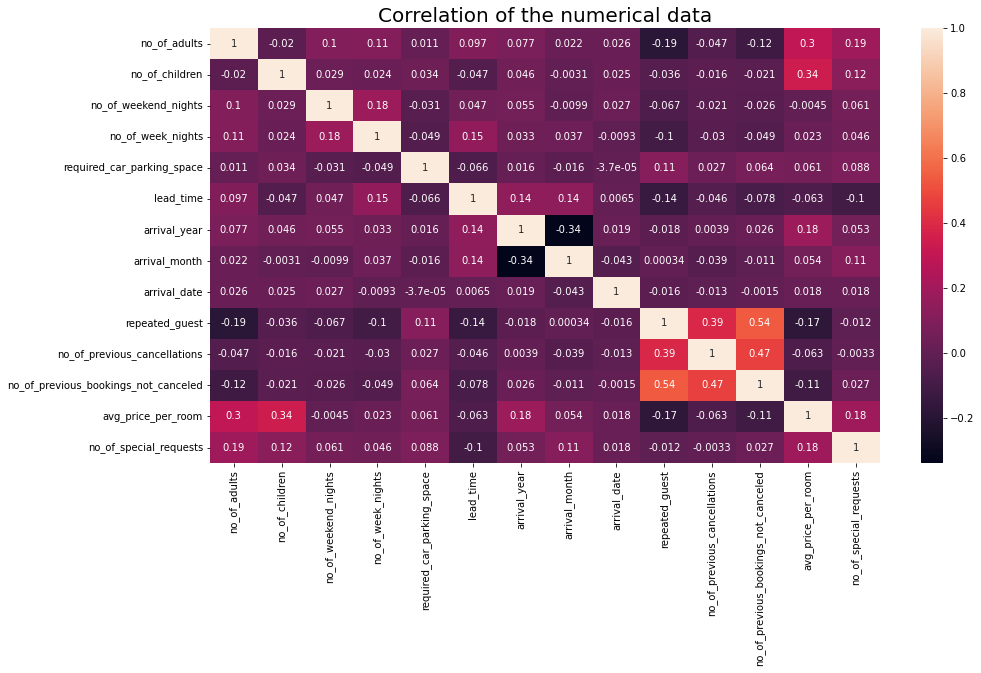

In [60]:
# 2b Enter your solution here
num_data = df.select_dtypes(exclude=object)
corr_data = num_data.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr_data, annot=True)
plt.title("Correlation of the numerical data", size=20)
plt.show()

### Qs 3:

Given the string shown below

```python
my_string = (
    "You can call me on this number:(+234) 287 576 3098 or 0808 576 8013. The first number is my personal number. "
    "Kyle Stevens, one of the company’s researchers, called on companies to buy fake URLs so that they can’t "
    "be used by scammers for example:'www.barclays-supports.com'."
    "https://zadarma.com/en/tariffs/numbers/united-states/mobile/ "
    "This is not even a valid url www.xyz .stutern.com. I tried calling this number:0803 5771 42 but it's invalid! "
    "Some random number +1-814-300-8859 which I found on this website:"
    "https://zadarma.com/en/tariffs/numbers/united-states/mobile/ "
    "https://drive.google.com/file/d/1oP5Xz-Nrze3cK5p56XS2UcxQN1B-kZs9/view?usp=share_link "
)
```
a.) Write a RegEx pattern that displays all the valid:

    i.) URLs

    ii.) phone numbers (11 or more digits)

b.) Given the array shown below:

```python
rng = np.random.default_rng(seed=15)
A = rng.random(size=(10, 5))
```

i.) write a code that **normalizes** the array, `A` using:

$$
x_{new} = \frac{x_{i} - x_{min}}{x_{max} - x_{min}}
$$

* Return the **descriptive statistics** of the normalized array.

ii.) Create **histogram** of the normalized array, `A`

In [15]:
my_string = (
    "You can call me on this number:(+234) 287 576 3098 or 0808 576 8013. The first number is my personal number. "
    "Kyle Stevens, one of the company’s researchers, called on companies to buy fake URLs so that they can’t "
    "be used by scammers for example:'www.barclays-supports.com'."
    "https://zadarma.com/en/tariffs/numbers/united-states/mobile/ "
    "This is not even a valid url www.xyz .stutern.com. I tried calling this number:0803 5771 42 but it's invalid! "
    "Some random number +1-814-300-8859 which I found on this website:"
    "https://zadarma.com/en/tariffs/numbers/united-states/mobile/ "
    "https://drive.google.com/file/d/1oP5Xz-Nrze3cK5p56XS2UcxQN1B-kZs9/view?usp=share_link "
)
my_string

"You can call me on this number:(+234) 287 576 3098 or 0808 576 8013. The first number is my personal number. Kyle Stevens, one of the company’s researchers, called on companies to buy fake URLs so that they can’t be used by scammers for example:'www.barclays-supports.com'.https://zadarma.com/en/tariffs/numbers/united-states/mobile/ This is not even a valid url www.xyz .stutern.com. I tried calling this number:0803 5771 42 but it's invalid! Some random number +1-814-300-8859 which I found on this website:https://zadarma.com/en/tariffs/numbers/united-states/mobile/ https://drive.google.com/file/d/1oP5Xz-Nrze3cK5p56XS2UcxQN1B-kZs9/view?usp=share_link "

In [16]:
# 3ai Enter your solution here
pattern = r"https:\/\/\w+\.\w+\.?\w*\/\w*\/\w+\/\w*\-?\w*\-?\w*\/\w+\-?\??\w+\/?\=?\w+\/?"
url = re.findall(pattern=pattern, string=my_string, flags=re.I)
for i in url:
    print(i)

https://zadarma.com/en/tariffs/numbers/united-states/mobile/
https://zadarma.com/en/tariffs/numbers/united-states/mobile/
https://drive.google.com/file/d/1oP5Xz-Nrze3cK5p56XS2UcxQN1B-kZs9/view?usp=share_link


In [17]:
# 3aii Enter your solution here
pattern = r"\(?\+?\d+\)?\s?\d{3,4}\s\d{3}\s\d{4}"
number = re.findall(pattern=pattern, string=my_string, flags=re.I)
number

['(+234) 287 576 3098', '0808 576 8013']

In [343]:
# 3bi Enter your solution here
rng = np.random.default_rng(seed=15)
A = rng.random(size=(10, 5))
min_ = np.min(A)
max_ = np.max(A)
numerator = np.subtract(A, min_)
denomerator = np.subtract(max_, min_)
normalize = np.divide(numerator, denomerator)

In [344]:
def descriptive(data: np.ndarray)-> pd.DataFrame:
    count = data.size
    mean = data.mean()
    std = data.std()
    min_ = data.min()
    _25_percentile = round(np.percentile(data, 25), 2)
    _50_percentile = round(np.percentile(data, 50), 2)
    _75_percentile = round(np.percentile(data, 75), 2)
    max_ = data.max()
    result = [count, mean, std, min_, _25_percentile, _50_percentile, _75_percentile, max_]
    result__ = pd.DataFrame(result,
                            index=("count","mean","std","min","25%", "50%", "75%","max"),
                           columns=["Descriptive Stat of Normalized A"])
    return result__
descriptive(normalize)

,Descriptive Stat of Normalized A
count,50.000000
mean,0.505670
std,0.308122
min,0.000000
25%,0.250000
50%,0.460000
75%,0.790000
max,1.000000


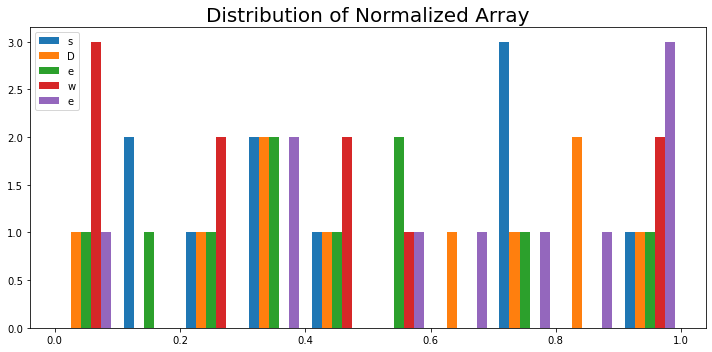

In [385]:
# 3bii Enter your solution here
plt.figure(figsize=(10,5))
plt.hist(normalize)
plt.title(f"Distribution of Normalized Array", size=20)
plt.tight_layout()
plt.legend(["s","D","e","w","e"])
plt.show()

### Qs 4

#### The data can be found [here](https://drive.google.com/file/d/1oP5Xz-Nrze3cK5p56XS2UcxQN1B-kZs9/view?usp=share_link)

a.) Clean the following columns: `price`, `SSD(GB)`, `warranty(years)`, `Display(inch)` \
Note: Return numerical values for the cleaned columns with the corresponding unit as the appended to the column name. \
e.g. \
SSD(GB) retuns: \
`512 GB HDD|512 GB SSD`: `512` \
The Display(inch) retuns: \
`38.1 cm (15 inch) Display`: `15`

* You might need to create **new columns** with the corresponding **column names**.
* **To validate your result, run**:

```python
df[["price", "SSD(GB)", "warranty(years)", "Display(inch)"]].sample(n=10, random_state=10)
```

b.) 

i.) Create a new column called `RAM_type` which extract the type of RAM. \
e.g. \
`32 GB LPDDR5 RAM`: `LPDDR5`

ii.) Create a new column called `is_SSD` which which checks whether the `RAM` is SSD or not. It returns `True` if it's an `SSD` otherwise, `False`

c.) Using the approriate column, create an new column called `Brand_name` by extracting the brand names. Validate your result by displaying the unique values in `Brand_name`

In [347]:
dff = pd.read_csv("laptops.csv").copy()
print(dff.shape)
dff.tail(100)

(920, 11)


,Unnamed: 0,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty
820,820,DELL Core i5 5th Gen - (8 GB/1 TB HDD/Windows ...,"₹68,990","₹69,500",Pre-installed Genuine Windows 10 Operating Sys...,Intel Core i5 Processor (5th Gen),8 GB DDR3 RAM,64 bit Windows 10 Operating System,1 TB HDD,39.62 cm (15.6 inch) Touchscreen Display,1 Year Onsite Warranty
821,821,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"₹59,990","₹81,99026% off",Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,NaN,1 Year Onsite Warranty
822,822,HP Ryzen 7 Octa Core - (16 GB/512 GB SSD/Windo...,"₹85,990","₹1,09,79921% off",AMD Ryzen 7 Octa Core Processor,16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,NaN,1 Year
823,823,DELL Core i7 11th Gen - (16 GB/512 GB SSD/Wind...,"₹99,900","₹1,18,15615% off",Intel Core i7 Processor (11th Gen),16 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,35.56 cm (14 inch) Touchscreen Display,Office Home and Student 2021,1 Year Onsite Warranty
824,824,DELL Vostro Ryzen 5 Hexa Core 5625U - (16 GB/5...,"₹60,990","₹79,29223% off",AMD Ryzen 5 Hexa Core Processor,16 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Display,NaN,1 Year Onsite Hardware Service
825,825,Lenovo B50-70 Notebook (4th Gen Ci5/ 8GB/ 1TB/...,"₹52,490",NaN,Intel Core i5 Processor (4th Gen),8 GB DDR3 RAM,64 bit Windows 8 Operating System,1 TB HDD,39.62 cm (15.6 inch) Display,NaN,Please Register your Warranty: http://support....
826,826,acer P2 Series Core i5 10th Gen - (8 GB/1 TB H...,"₹47,990","₹59,50019% off",Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,35.56 cm (14 inch) Display,NaN,1 Year warranty
827,827,Lenovo IdeaPad Flex 3 Chromebook Celeron Dual ...,"₹28,490","₹40,49029% off",Intel Celeron Dual Core Processor,4 GB LPDDR4X RAM,64 bit Chrome Operating System,29.46 cm (11.6 inch) Touchscreen Display,1 Year Onsite�Warranty,NaN,NaN
828,828,ASUS ASUS TUF Gaming A15 Ryzen 7 Octa Core 680...,"₹1,15,990","₹1,75,99034% off",AMD Ryzen 7 Octa Core Processor,16 GB DDR4 RAM,Windows 11 Operating System,1 TB SSD,39.62 cm (15.6 Inch) Display,NaN,1 Year Onsite Warranty
829,829,Infinix X1 Slim Series Core i7 10th Gen - (16 ...,"₹54,990","₹69,99921% off",Intel Core i7 Processor (10th Gen),16 GB LPDDR4X RAM,64 bit Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Display,NaN,1 Year Onsite Warranty


In [348]:
pattern = r"(\d+)"
dff["price"]= dff["price"].str.replace(",", "").str.extract(pattern).astype(float)

In [349]:
pattern = r"(\d+\s?GB\s+SSD)"
x = dff["SSD"].str.extract(pat=pattern, flags=re.I)
dff["SSD(GB)"] = x[0].str.extract(pat=r"(\d+)", flags=re.I)
dff["SSD(GB)"].unique()

array([nan, '256', '512', '128'], dtype=object)

In [350]:
pattern = r"(\d+\sYear)"
x = dff["warranty"].str.extract(pat=pattern, flags=re.I)
dff["warranty(year)"] = x[0].str.extract(pat=r"(\d+)", flags=re.I)
dff["warranty(year)"].unique()

array([nan, '1', '2', '3'], dtype=object)

In [351]:
pattern = r"(\d+\.?\d*\sinch)"
x = dff["Display"].str.extract(pat=pattern, flags=re.I)
dff["Display(inch)"] = x[0].str.extract(pat=r"(\d+\.?\d*)", flags=re.I)
dff["Display(inch)"].unique()

array([nan, '14', '15.6', '17.3', '13.3', '16', '13.6', '16.2', '15',
       '14.1', '16.1', '14.96', '15.3', '13.4', '14.2', '14.5', '13.5',
       '11.6', '13', '17', '12'], dtype=object)

In [207]:
# 4a Enter your solution here
dff[["title", "price", "RAM", "SSD", "warranty", "Display", "SSD(GB)", "warranty(year)", "Display(inch)"]].head(10)

,title,price,RAM,SSD,warranty,Display,SSD(GB),warranty(year),Display(inch)
0,DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/...,37990.0,RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD,"Display: 15.6"" FHD WVA AG Narrow Border",8 GB DDR4 RAM,Intel Core i3 Processor (11th Gen),NaN,NaN,NaN
1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,35490.0,8 GB DDR4 RAM,256 GB SSD,1 Year Onsite Warranty,35.56 cm (14 inch) Display,256,1,14
2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB ...,33999.0,8 GB DDR4 RAM,512 GB SSD,1 Year Onsite Warranty + 1 Year Accidental Dam...,39.62 cm (15.6 Inch) Display,512,1,15.6
3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB S...,45490.0,8 GB DDR4 RAM,512 GB SSD,1 Year Onsite Warranty,39.62 cm (15.6 Inch) Display,512,1,15.6
4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,33990.0,8 GB DDR4 RAM,512 GB SSD,1 Year Onsite Warranty,39.62 cm (15.6 inch) Display,512,1,15.6
5,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 7...,67990.0,8 GB DDR4 RAM,512 GB SSD,1 Year onsite warranty,43.94 cm (17.3 Inch) Display,512,1,17.3
6,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,52990.0,8 GB DDR4 RAM,512 GB SSD,1 Year Onsite Warranty,43.94 cm (17.3 Inch) Display,512,1,17.3
7,ASUS VivoBook K15 OLED (2022) Ryzen 5 Hexa Cor...,47990.0,8 GB DDR4 RAM,1 TB HDD|256 GB SSD,1 Year Onsite Warranty,39.62 cm (15.6 inch) Display,256,1,15.6
8,HP Ryzen 5 Hexa Core 5500U - (16 GB/512 GB SSD...,49123.0,16 GB DDR4 RAM,512 GB SSD,1 Year Onsite Warranty,39.62 cm (15.6 Inch) Display,512,1,15.6
9,HP 15s Intel Core i5 12th Gen - (8 GB/512 GB S...,57499.0,8 GB DDR4 RAM,512 GB SSD,1 Year Onsite Warranty,39.62 cm (15.6 inch) Display,512,1,15.6


In [352]:
# 4bi Enter your solution here
pattern = r"([A-Z]{2,10}\d+\w?)"
dff["RAM_type"]  = dff["RAM"].str.extract(pat=pattern, flags=re.I)
dff["RAM_type"].unique()

array(['DDR4', 'LPDDR4X', 'DDR5', 'LPDDR5', nan, 'LPDDR4', 'DDR3',
       'LPDDR3'], dtype=object)

In [353]:
# 4bii Enter your solution here
pattern = r"SSD"
dff["is_SSD"] = dff["SSD"].str.contains(pat=pattern, flags=re.I)
dff["is_SSD"].unique()

array([False,  True])

In [271]:
# let confirm
dff[["SSD","is_SSD"]]

,SSD,is_SSD
0,"Display: 15.6"" FHD WVA AG Narrow Border",False
1,256 GB SSD,True
2,512 GB SSD,True
3,512 GB SSD,True
4,512 GB SSD,True
5,512 GB SSD,True
6,512 GB SSD,True
7,1 TB HDD|256 GB SSD,True
8,512 GB SSD,True
9,512 GB SSD,True


In [354]:
# 4c Enter your solution here
pattern = r"(\w+)"
dff["Brand_name"] = dff["title"].str.extract(pat=pattern, flags=re.I)
dff["Brand_name"].unique()

array(['DELL', 'HP', 'Lenovo', 'ASUS', 'RedmiBook', 'acer', 'Infinix',
       'APPLE', 'MSI', 'SAMSUNG', 'realme', 'ALIENWARE', 'GIGABYTE',
       'Avita', 'Nokia', 'Vaio', 'Mi', 'LG', 'Ultimus'], dtype=object)